# Tugas Pert 10
Muhammad Insan Kamil
5210411367

*   Robert
*   Sobel
*   Prewitt
*   Laplacian

<ipython-input-1-4a9430a04f7e>:21: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  edge_laplacian = sp.zeros(lapl.shape)


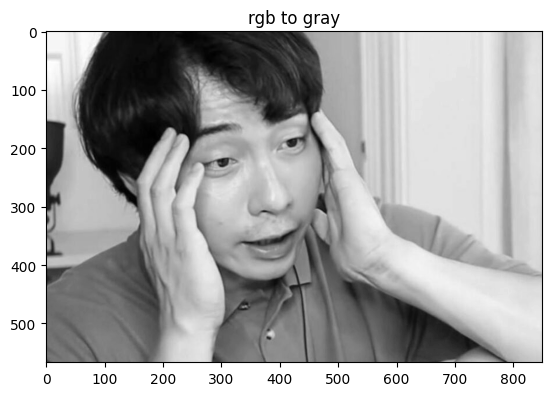

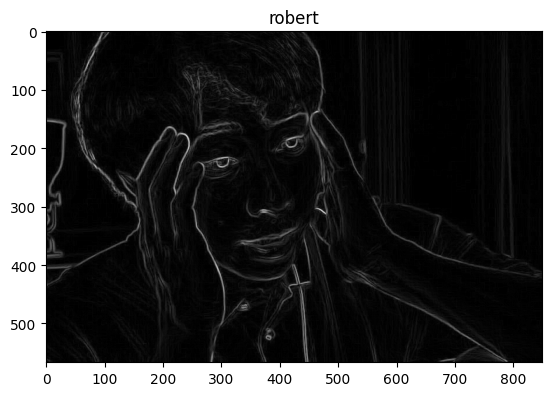

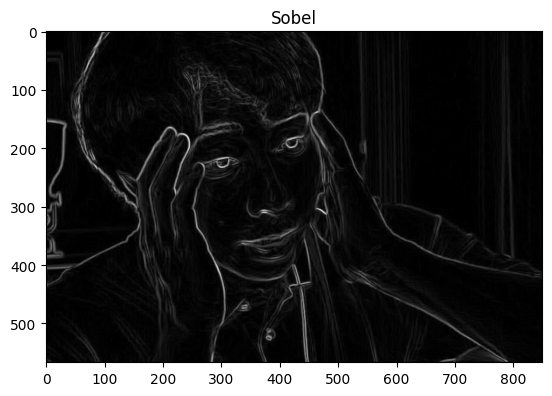

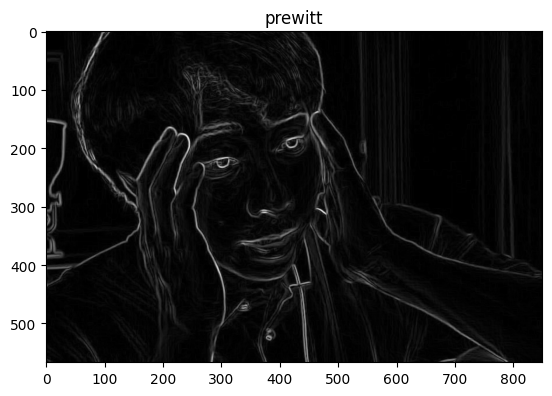

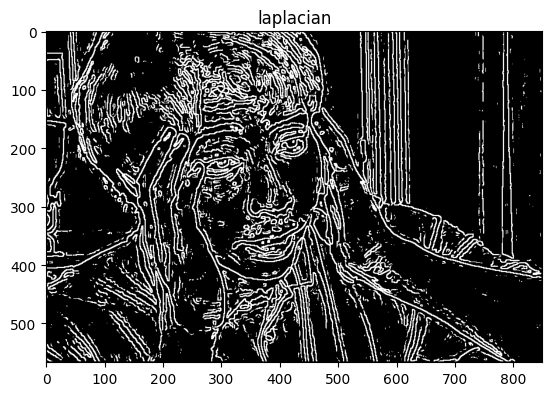

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import io
from skimage.color import rgb2gray
import scipy.ndimage as nd
import scipy as sp

img=io.imread("https://monodramatic.com/wp-content/uploads/2020/09/uncle_roger_reaction_rice_bbc_%C2%A9uncleroger_youtube_video-850x567.jpg")
img_libgray=rgb2gray(img)

#Metode Roberts
edge_roberts = filters.roberts(img_libgray)
#Metode Sobel
edge_sobel = filters.sobel(img_libgray)
#Metode Prewitt
edge_prewitt = filters.prewitt(img_libgray)
#Metode Laplacian
lapl = nd.gaussian_laplace(img_libgray, 2)
thres = np.absolute(lapl).mean() * 0.75
edge_laplacian = sp.zeros(lapl.shape)
w = edge_laplacian.shape[1]
h = edge_laplacian.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = lapl[y-1:y+2, x-1:x+2]
        p = lapl[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            edge_laplacian[y, x] = 1

plt.imshow(img_libgray,cmap =plt.cm.gray)
plt.title('rgb to gray')
plt.figure()
plt.imshow(edge_roberts, cmap=plt.cm.gray)
plt.title('robert')
plt.figure()
plt.title('Sobel')
plt.imshow(edge_sobel, cmap=plt.cm.gray)
plt.figure()
plt.title('prewitt')
plt.imshow(edge_prewitt, cmap=plt.cm.gray)
plt.figure()
plt.title('laplacian')
plt.imshow(edge_laplacian, cmap=plt.cm.gray)